In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
up=files.upload()

Saving fetal_health.csv to fetal_health (1).csv


In [ ]:
df=pd.read_csv('fetal_health.csv')

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.shape

(2126, 22)

Checking if there are some null values in the entire dataframe:

In [ ]:
df.isnull().sum().sum()

0

Confirming non null values in each feature and their corresponding data type:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

As we see above all features even the label are numerical, therefore processing of categorical variables is something that will not be done in this project, we will only explore the distribution and meaning of each numerical.

# Feature Engineering

Let's see the distribution of the label:

In [ ]:
df.fetal_health.value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

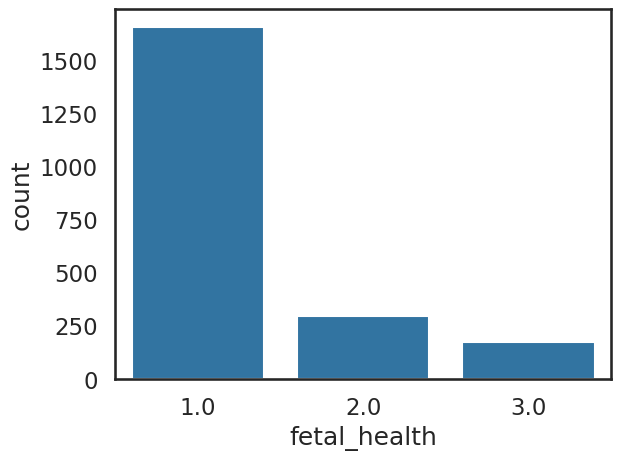

In [ ]:
sns.countplot(x='fetal_health',data=df)

Let's see the histogram of each feature:

array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>],
       [<Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>,
        <Axes: title={'center': 'severe_decelerations'}>],
       [<Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>],
       [<Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>],
       [<Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: 

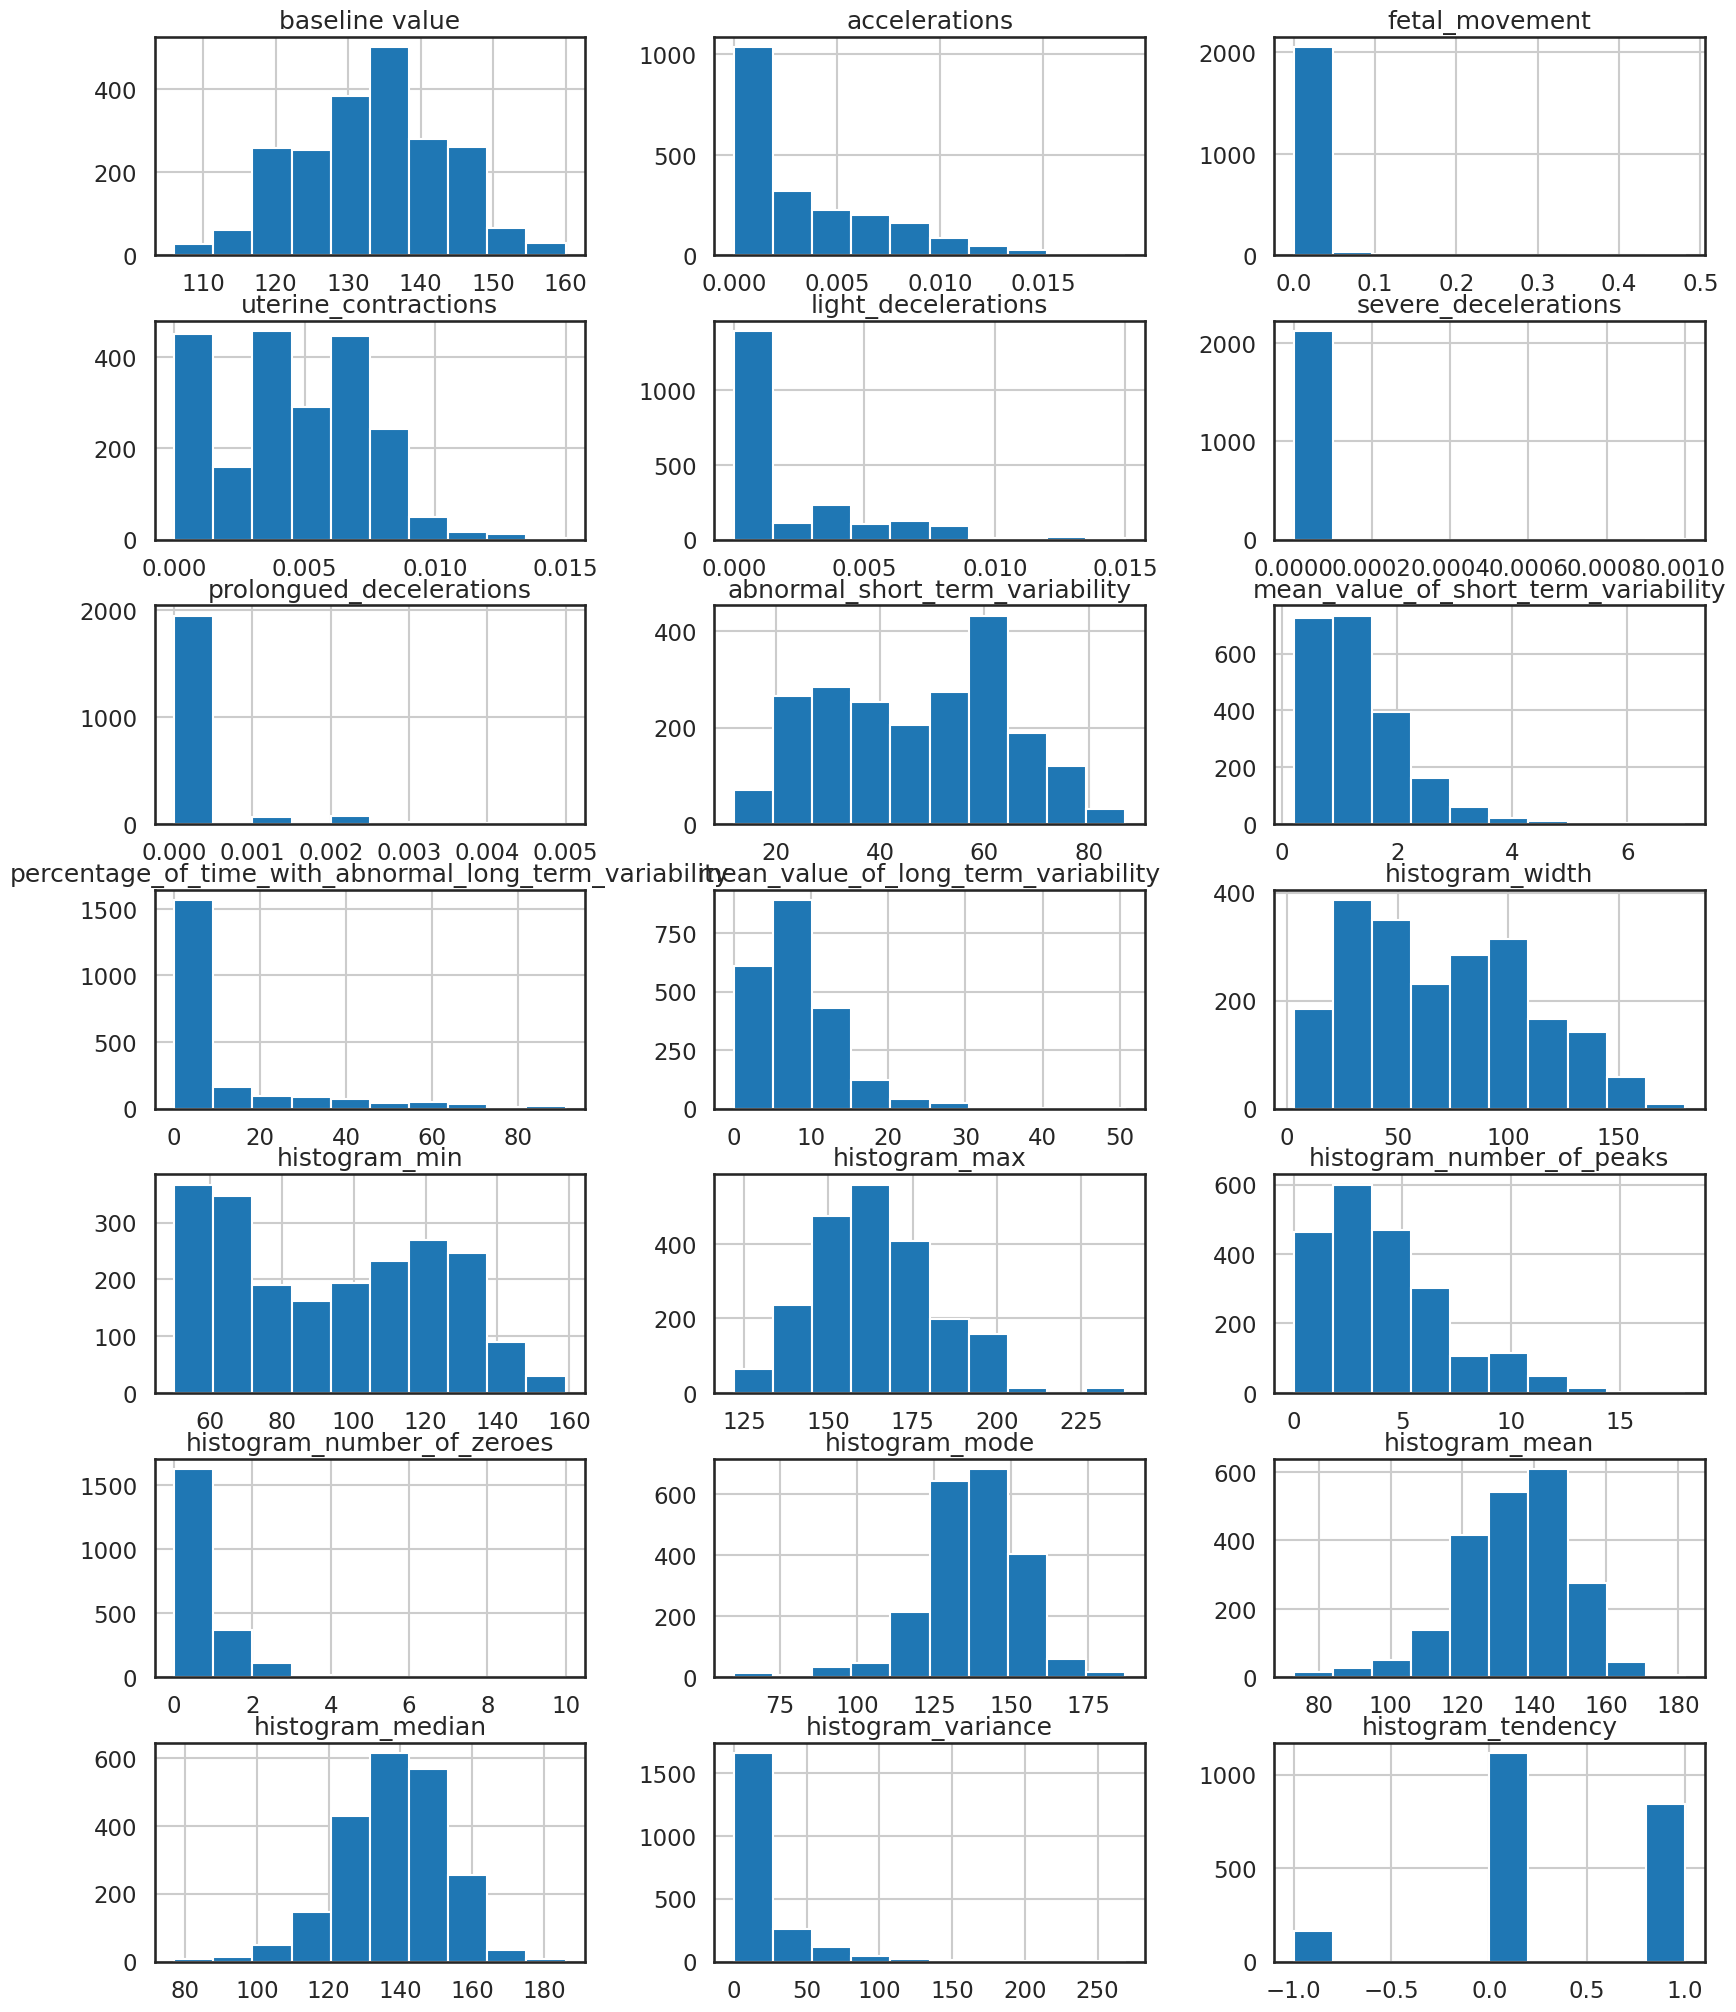

In [ ]:
# taking only x - features
df.iloc[:,:-1].hist(figsize=[20,25], layout=[7,3])

Looking carefully to every histogram we could say that at least 9 features are extremely skewed and contain a significant amount of outliers, giving us the idea that these could be scaled using some technique

 some of these are already standardized whereas others not yet.

 In order to assure a flawless performance of the classifiers models we will scale every feature by standardization.

Statistical summary of features using 'describe table':

In [ ]:
df.iloc[:,:-1].describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


The following is a summary of the 9 most skewed features:

In [ ]:
df[['fetal_movement', 'histogram_number_of_zeroes', 'histogram_variance', 'light_decelerations',
   'mean_value_of_long_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability',
   'prolongued_decelerations','severe_decelerations']].describe().T

,count,mean,std,min,25%,50%,75%,max
fetal_movement,2126.0,0.009481,0.046666,0.0,0.0,0.0,0.003,0.481
histogram_number_of_zeroes,2126.0,0.323612,0.706059,0.0,0.0,0.0,0.000,10.000
histogram_variance,2126.0,18.808090,28.977636,0.0,2.0,7.0,24.000,269.000
light_decelerations,2126.0,0.001889,0.002960,0.0,0.0,0.0,0.003,0.015
mean_value_of_long_term_variability,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.800,50.700
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.000,91.000
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.0,0.0,0.000,0.005
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.0,0.0,0.000,0.001


In [ ]:
features = df.iloc[:,:-1] # x
label=df['fetal_health'] # y

In [ ]:
features.shape, label.shape

((2126, 21), (2126,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,label , random_state=42, test_size = 0.3)

# Modeling


 Random Forest with the best number of trees.


Before building the different models let's declare some error metrics in order to compare the performace of each one:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [ ]:
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [ ]:
X_train_s

array([[-0.20647709,  1.2119168 , -0.20748241, ...,  0.6212933 ,
         0.09685987,  1.12223563],
       [ 0.89941853, -0.83325722, -0.20748241, ...,  0.6212933 ,
        -0.58074936, -0.51973745],
       [ 0.3967387 , -0.32196372, -0.20748241, ...,  0.2131324 ,
         0.13074033,  1.12223563],
       ...,
       [-1.11130078,  0.44497654, -0.20748241, ..., -0.80726984,
         0.40178402, -0.51973745],
       [-1.81505254, -0.06631697, -0.20748241, ..., -0.60318939,
         0.87611048, -0.51973745],
       [ 0.89941853, -0.57761047, -0.20748241, ...,  0.75734693,
        -0.51298844,  1.12223563]])

In [ ]:
X_test_s

array([[-0.00540516, -0.32196372, -0.0080806 , ...,  0.00905196,
        -0.34358613, -0.51973745],
       [-0.80969288, -0.83325722, -0.18754223, ..., -0.87529665,
         0.3340231 ,  1.12223563],
       [-0.20647709,  0.18932979, -0.14766187, ..., -0.39910894,
         0.06297941, -0.51973745],
       ...,
       [ 1.50263432, -0.83325722, -0.20748241, ...,  1.57366872,
        -0.64851028, -0.51973745],
       [-1.01076481, -0.32196372, -0.20748241, ..., -0.73924302,
        -0.51298844,  1.12223563],
       [ 1.30156239,  1.97885705, -0.18754223, ...,  1.16550783,
        -0.1064229 ,  1.12223563]])

## Random Forest

The number of trees will be selected by computing the 'out of bag error' of models with number of trees from 15 until 400, plotting their corresponding error and warm_start will be set to True to just add more trees to the existing ones reducing execution time.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1) # multiple job at a time
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train_s, y_train)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.080645
20.0,0.081317
30.0,0.072581
40.0,0.073925
50.0,0.067876
100.0,0.065860
150.0,0.064516
200.0,0.061828
300.0,0.061828


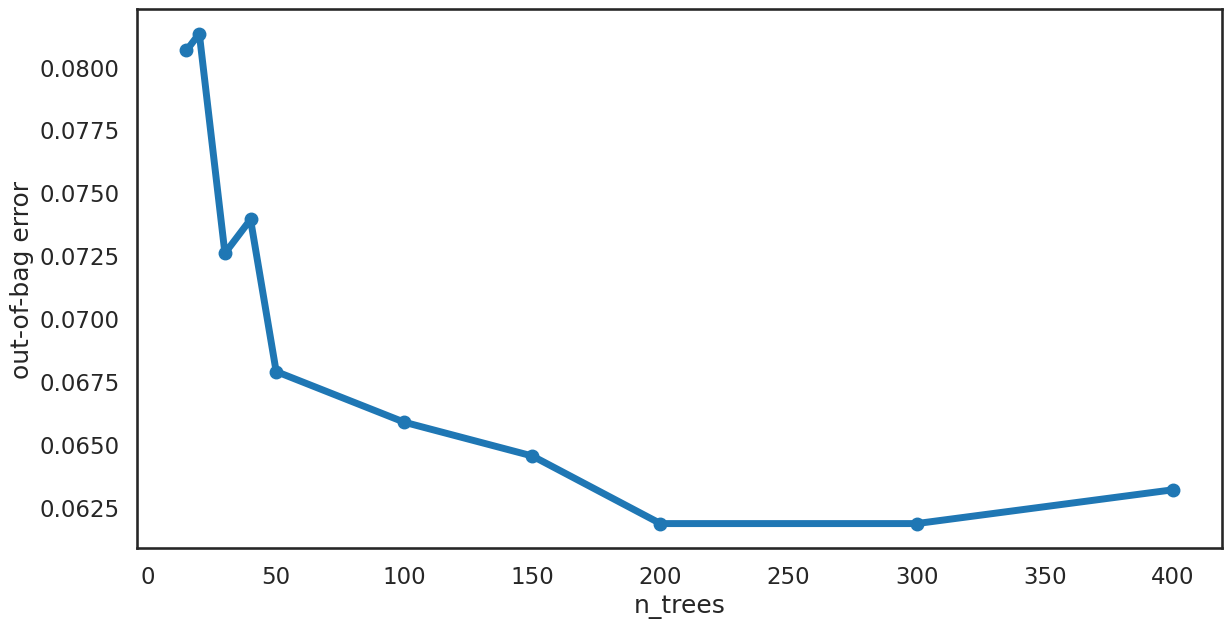

In [ ]:
sns.set_context('talk') # text size
#  context is "notebook", "paper", "talk","poster"
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

We can see when the number of trees is around 300 the model has the lowest error, thus we will build a new model with this characteristics:

In [ ]:
RF_300 = RandomForestClassifier(n_estimators=300
          ,oob_score=True
          ,random_state=42
          ,n_jobs=-1)
# n_jobs - number of jobs to run in parallel - ( -1 all )

RF_300.fit(X_train_s,y_train)
oob_error300 = 1 - RF_300.oob_score_
oob_error300

0.06182795698924726

In [ ]:
y_pred_rf=RF_300.predict(X_test_s)

Printing the class predicted for each instance and then the probabilities:

In [ ]:
y_pred_rf=RF_300.predict(X_test_s).T
pd.DataFrame(y_pred_rf,columns=['Class predicted']).head(10)

,Class predicted
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,3.0
6,1.0
7,3.0
8,2.0
9,2.0


In [ ]:
pd.DataFrame(RF_300.predict_proba(X_test_s),columns=['1','2','3']).head(10)

,1,2,3
0,0.993333,0.006667,0.000000
1,1.000000,0.000000,0.000000
2,0.970000,0.010000,0.020000
3,1.000000,0.000000,0.000000
4,0.990000,0.000000,0.010000
5,0.000000,0.060000,0.940000
6,1.000000,0.000000,0.000000
7,0.040000,0.040000,0.920000
8,0.133333,0.866667,0.000000
9,0.053333,0.933333,0.013333


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.90      0.75      0.82       101
         3.0       0.88      0.93      0.90        41

    accuracy                           0.94       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



Until now Random Forest has the best performance,

In [ ]:
# metrics

We can see above that all models had outstanding performances, even the accuracy of the worst is almost 96% which is not far than 97.5% of the best one, however as we are dealing with a medical environment and the health of patients is the most important the recommended model is Random Forest due to its highest metrics, relatively fast training and easy interpretability. From here we will compute all metrics and plots related to our chosen model.  
Let's plot the confusion matrix:

## Plottings of the best model

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

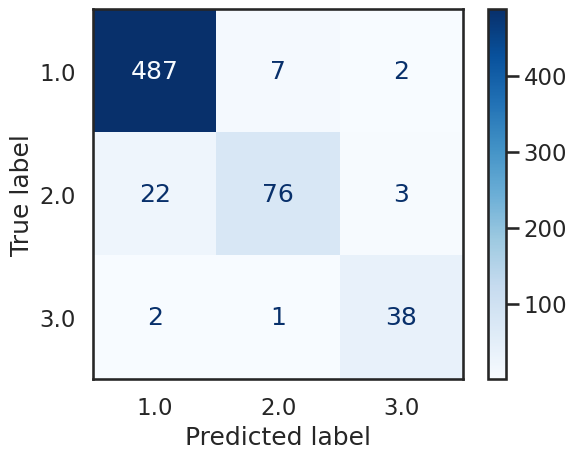

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=RF_300.classes_)
disp.plot(cmap='Blues')

The model has misclassified some instances which belong to class 1 and 2, this is why precision and recall for these classes had values of 97%, but overall it has classified correctly the huge majority.

Plotting ROC Curve and Precision-Recall Curve:

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve
sns.set_context('talk')

In [ ]:
y_prob = RF_300.predict_proba(X_test_s)

In [ ]:
y_test_b=label_binarize(y_test, classes=[1,2,3])

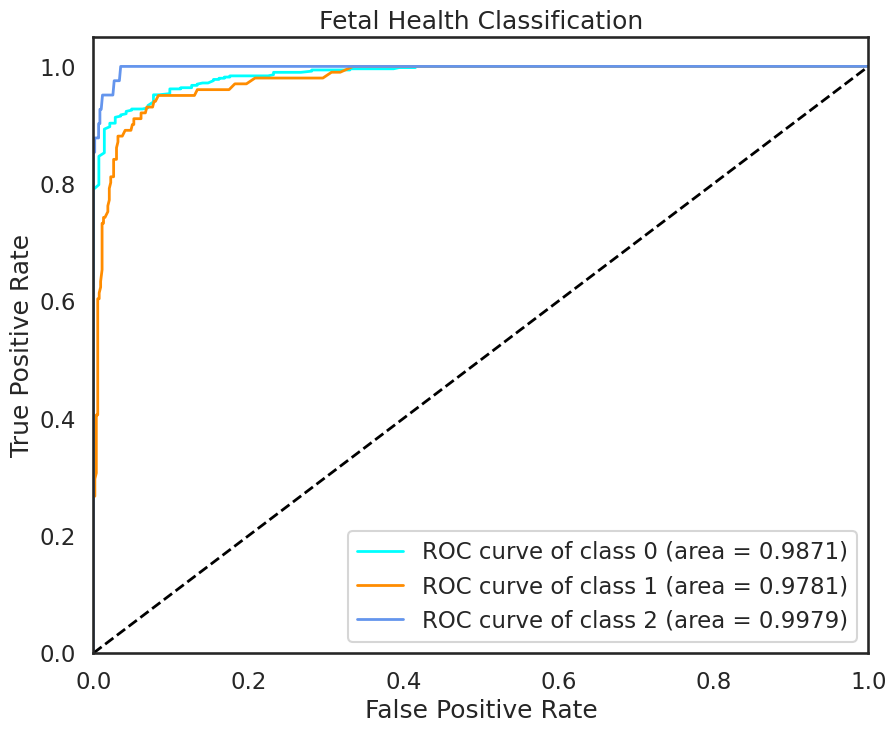

In [ ]:
from itertools import cycle
from sklearn.metrics import auc
fpr = dict()
tpr = dict()
roc_auc = dict()

n_class = 3
lw = 2
plt.figure(figsize=(10,8))

for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_class), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=lw,label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot(([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fetal Health Classification')
plt.legend(loc='best')
plt.show()

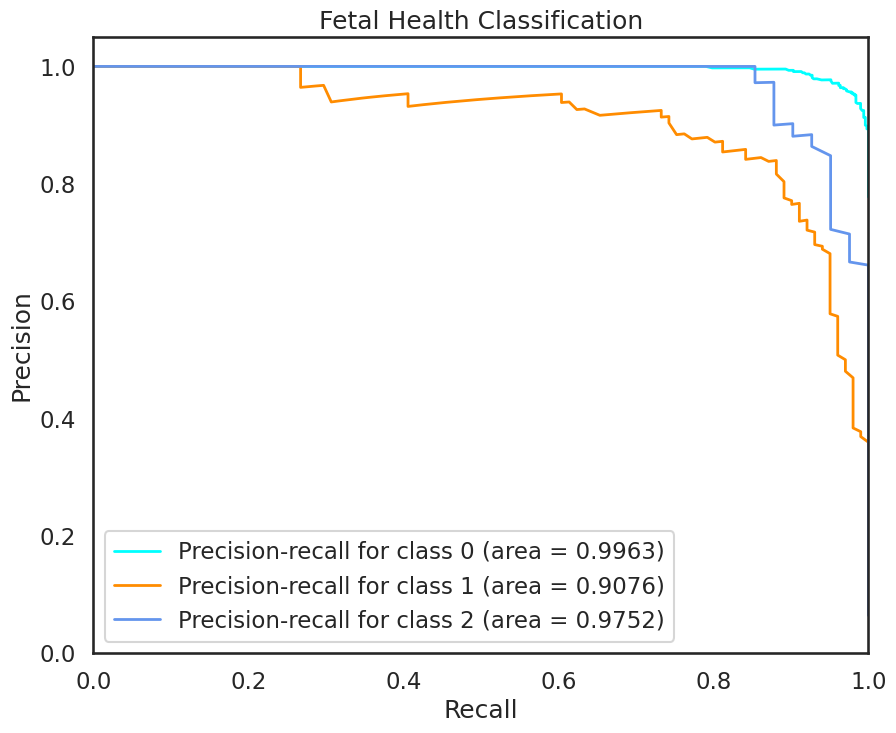

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
lines = []
labels = []
plt.figure(figsize=(10,8))

for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(y_test_b[:, i],y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_b[:, i], y_prob[:, i])

for i, color in zip(range(n_class), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='Precision-recall for class {0} (area = {1:0.4f})'
             ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Fetal Health Classification')
plt.legend(loc='lower left')
plt.show()

The effect of balancing the classes in our label (oversampling) was evident at avoiding a tendency towards predicting more the class 0 and also allowed us to compare much better the classification in the confusion matrix by having approximately the same proportion of them. Another highlight is that as it corresponds to a tree-based model we could have simply used features without encoding nor scaling which makes the building of this much easier and fast, whereas polynomial transformation had a significant and worthy effect and as we will see in the plot of the feature importances below the two biggest predictors were created in this process, this is a clear evidence which supports the use of polynomials in the training of models.

In [ ]:
RF_300.feature_importances_
# Feature (variable) importance indicates how much each
# feature contributes to the model prediction

array([0.04829159, 0.05026057, 0.02088248, 0.03532596, 0.00908532,
       0.00084837, 0.05065117, 0.13206083, 0.11987204, 0.09920472,
       0.04500733, 0.03871585, 0.03952985, 0.02916344, 0.01999598,
       0.00387193, 0.06384807, 0.10054974, 0.05224789, 0.03311087,
       0.00747601])

In [ ]:
print(accuracy_score(RF_300.predict(X_test_s),y_test))

0.9420062695924765
